<a href="http://www.road2quant.com">
    <img src="https://uploads-ssl.webflow.com/5eae007d92687089219c5dec/5eb47da29ced78042e9768ce_long_logo.png" target="_blank" align="right" border="0" width="35%" >
</a>

# Intro to Machine Learning Based Strategies

## Importing the required libraries

The libraries that we are going to use are:
- `Yfinance` to download the daily prices from yahoo finance.
- `Numpy` and `Pandas` to manipulate the data.
- `Matplotlib` to create the charts


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

### Graph Formating

In [2]:
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
symbol = ["AMZN"]
rawdata = yf.download(symbol, start="2010-01-01", end="2019-12-31")
rawdata = pd.DataFrame(rawdata['Close'])
rawdata.columns = ['price']

[*********************100%***********************]  1 of 1 completed


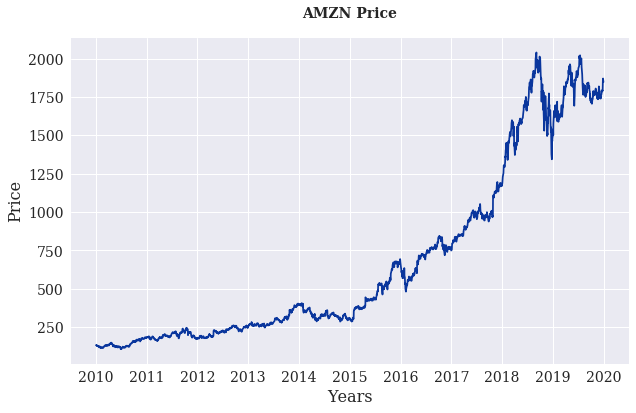

In [181]:
plt.figure(figsize=(10, 6))
plt.title('AMZN Price',fontweight="bold", pad=20)
plt.xlabel('Years')
plt.ylabel('Price')
plt.plot(rawdata, color='#0A369D');
# plt.savefig('paths.png', facecolor='None')

In [80]:
LR = rawdata.copy()
LR['indx'] = np.arange(len(LR))

split = int(len(LR) * 0.8)
LR_train, LR_test = LR[:split], LR[split:]

X_test  = LR_test['indx'].values
X_train = LR_train['indx'].values
y_train = LR_train['price'].values

reg = np.polyfit(X_train, y_train, deg=1)
reg

array([  0.43376732, -20.04042024])

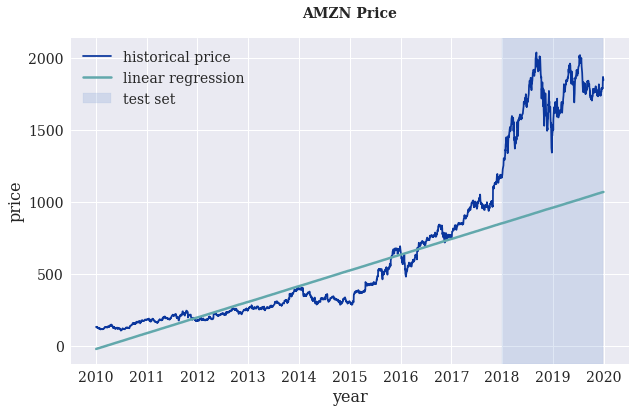

In [81]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.plot(LR.index,LR['price'],label='historical price', color='#0A369D')
ax.plot(LR.index, np.polyval(reg, LR['indx']), lw=2.5,
         label='linear regression', color='#62a8ac')
ax.axvspan(LR.index[split], LR.index[len(LM)-1], alpha=0.25, color='#80A1D4', label='test set')
ax.set_title('AMZN Price',fontweight="bold", pad=20)
ax.set_xlabel('year')
ax.set_ylabel('price')
plt.legend(loc=0);

In [91]:
lags = 7  # seven historical lags

In [122]:
cols = []
lagsR = rawdata.copy()

for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    lagsR[col] = lagsR['price'].shift(lag)
    cols.append(col)
lagsR.dropna(inplace=True)

In [123]:
lagsR

,price,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2010-01-13,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000,134.690002,133.899994
2010-01-14,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000,134.690002
2010-01-15,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000,132.250000
2010-01-19,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004,130.000000
2010-01-20,125.779999,127.610001,127.139999,127.349998,129.110001,127.349998,130.309998,133.520004
...,...,...,...,...,...,...,...,...
2019-12-23,1793.000000,1786.500000,1792.280029,1784.030029,1790.660034,1769.209961,1760.939941,1760.329956
2019-12-24,1789.209961,1793.000000,1786.500000,1792.280029,1784.030029,1790.660034,1769.209961,1760.939941
2019-12-26,1868.770020,1789.209961,1793.000000,1786.500000,1792.280029,1784.030029,1790.660034,1769.209961


In [124]:
a = lagsR[cols].corr()
a.round(3)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
lag_1,1.000,1.000,0.999,0.999,0.999,0.998,0.998
lag_2,1.000,1.000,1.000,0.999,0.999,0.999,0.998
lag_3,0.999,1.000,1.000,1.000,0.999,0.999,0.999
lag_4,0.999,0.999,1.000,1.000,1.000,0.999,0.999
lag_5,0.999,0.999,0.999,1.000,1.000,1.000,0.999
lag_6,0.998,0.999,0.999,0.999,1.000,1.000,1.000
lag_7,0.998,0.998,0.999,0.999,0.999,1.000,1.000


In [126]:
reg = np.linalg.lstsq(lagsR[cols], lagsR['price'],
                      rcond=None)[0]

In [129]:
lagsR['prediction'] = np.dot(lagsR[cols], reg)

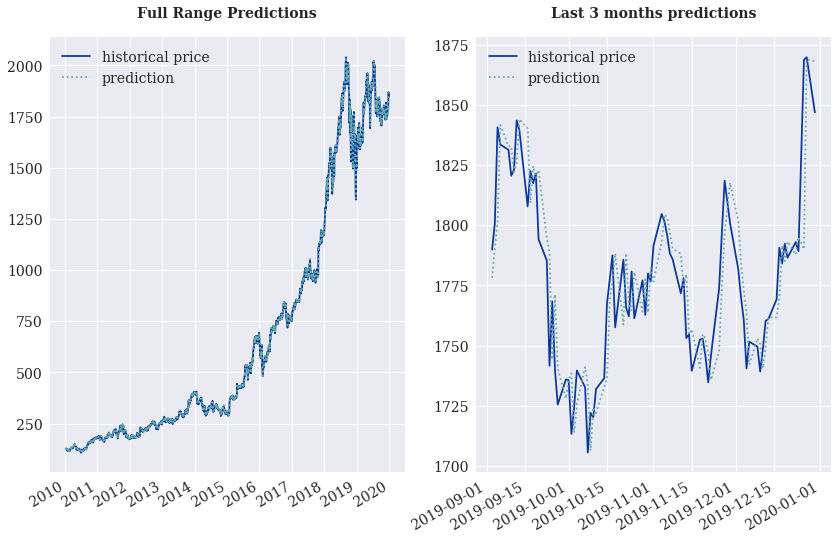

In [180]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
plt.plot(lagsR.index, lagsR['price'], label='historical price', color='#0A369D')
plt.plot(lagsR.index, lagsR['prediction'], label='prediction', linestyle=':', color='#62a8ac')
plt.title('Full Range Predictions',fontweight="bold", pad=20)
plt.legend(loc=0)
plt.setp(plt.xticks()[1], rotation=30, ha='right');

plt.subplot(1,2,2)
plt.plot(lagsR.loc['2019-9-1':].index, lagsR['price'].loc['2019-9-1':],
         label='historical price', color='#0A369D')
plt.plot(lagsR.loc['2019-9-1':].index, lagsR['prediction'].loc['2019-9-1':],
         label='prediction', linestyle=':', color='#62a8ac')
plt.title('Last 3 months predictions',fontweight="bold", pad=20)
plt.legend(loc=0)
plt.setp(plt.xticks()[1], rotation=30, ha='right');